<a href="https://colab.research.google.com/github/kimjeongsoo20190147/fisa04/blob/main/0224_ML05_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

np.set_printoptions(precision=6, suppress=True)

pd.options.display.float_format = '{:.5f}'.format
pd.reset_option('display.float_format')

# 2. 지도학습 - 회귀 분석(Regression Analysis)

- 관찰된 **연속형 변수**들에 대해 두 변수 사이의 모형을 구한뒤 적합도를 측정해 내는 분석 방법

- 단순회귀분석(simple regression analysis)
    - 하나의 종속변수와 하나의 독립변수 사이의 관계를 분석
    - wx + b = yhat

- 다중회귀분석(multiple regression analysis)    
   - 하나의 종속변수와 여러 독립변수 사이의 관계를 규명하고자 할 경우
   - w1x1 + w2x2 + w3x3 + .... + b = yhat
**예시**
- 주택 가격 예측
- 매출액 예측
- 주가 예측
- 온도 예측

대표 회귀 모델:
- 최소제곱법(Ordinary Least Squares)을 활용한 *LinearRegression*
- 경사하강법(Gradient Descent)을 활용한 *SGDRegressor*
- 선형 회귀 모델에 L1, L2 규제를 더한 *Ridge(제곱), Lasso(절대값), ElasticNet(상호보완)* 등

- 대조 : 주어진 특성에 따라 어떤 대상을 유한한 범주(타깃값)으로 구분하는 방법. 범주형 데이터



### 참고 : 선형 모델(Linear Models)

- 선형 모델은 입력 데이터에 대한 선형 함수를 만들어 예측 수행
- 회귀 분석을 위한 선형 모델은 다음과 같이 정의

\begin{equation}
\hat{y}(w,x) = w_0 + w_1 x_1 + ... + w_p x_p
\end{equation}

  + $x$: 입력 데이터
  + $w$: 모델이 학습할 파라미터
  + $w_0$: 편향
  + $w_1$~$w_p$: 가중치

<img src="https://t1.daumcdn.net/cfile/tistory/997E924F5CDBC1A628">

- 출처: https://walkingwithus.tistory.com/606


선형 회귀분석의 4가지 기본 가정
- 선형성:  예측하고자 하는 종속변수 y와 독립변수 x 간에 선형성을 만족한다는 특성
- 독립성: 독립변수 x 간에 상관관계가 없이 독립성을 만족하는 특성 (다중회귀시)
- 등분산성: 분산이 같다는 것은 특정한 패턴 없이 고르게 분포했다는 의미
- 정규성: 잔차(예측치와 실제치의 차이)가 정규성을 만족하는지 여부

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fc2F0oL%2FbtqFrUmcmlD%2FVjSZQF79ZksxaEj8Whmcz0%2Fimg.png)

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fb3hByu%2FbtqFtIZDYBM%2FJDksb4QoJfgyy5BLFRRG4k%2Fimg.png)


## 데이터 생성

In [ ]:
# y = 2x + 5

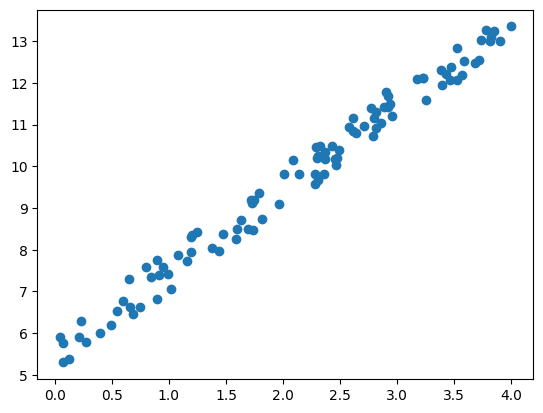

In [2]:
# yhat = wx + b    2x + 5
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
w1 = 2 # x의 계수
w0 = 5 # 편향 (y절편)

noise = np.random.rand(100, 1) # 잡음
# noise = 0

# 잡음
x = np.random.rand(100, 1) * 4 # 0~4 사이의 실수값 100개 만듭니다
y = w1*x + w0 + noise
plt.scatter(x, y);



In [11]:
from sklearn.linear_model import LinearRegression


# 모델 인스턴스를 만든다
li_model = LinearRegression()


# 데이터를 fit 한다
li_model.fit(x,y) # ax + b

# 데이터를 fit 한 모델로 predict 한다
y_pred = li_model.predict(x)

# 모델의 성능을 측정한다. score
li_model.score(x,y)
#결과가 0.98인데 이는 100개 중 98개를 맞춘게 아님.
#오차를 누적해서 더하는 개념이기 때문에 0에 가까울수록 좋은 값, 커질수록 나쁜값, 1보다 얼마든지 더 커질 수 있게됨


0.9831081424561687

In [9]:
y[0:5] # 실제값

array([[10.971346],
       [ 7.875253],
       [11.484316],
       [13.242392],
       [ 7.41368 ]])

In [10]:
y_pred[:5]

array([[10.885013],
       [ 7.650633],
       [11.340081],
       [13.140402],
       [ 7.482058]])

In [12]:
dir(li_model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'fit',


In [13]:
print(li_model.rank_) # 1 - 독립변수로 1개의 축(특성)
print(li_model.intercept_) # 5.5 상수항 y=ax+
print(li_model.coef_)

1
[5.509166]
[[1.982781]]


In [17]:
from sklearn.metrics import accuracy_score

# 분류모델의 성능평가지표 0, 1, 2
accuracy_score(y_pred, y) # ValueError : continous is not supported

ValueError: continuous is not supported

0.9831081424561687

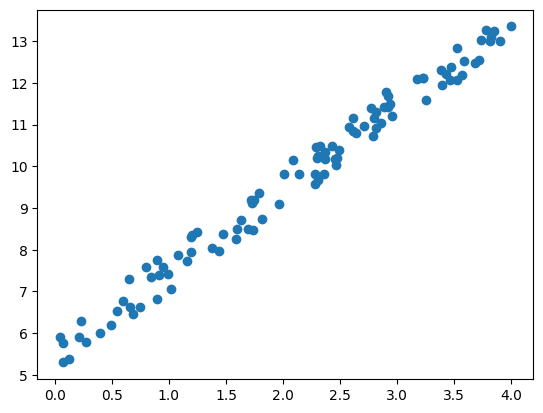

In [18]:
# yhat = wx + b    2x + 5
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
w1 = 2 # x의 계수
w0 = 5 # 편향 (y절편)

noise = np.random.rand(100, 1) # 잡음
# noise = 0

# 잡음
x = np.random.rand(100, 1) * 4 # 0~4 사이의 실수값 100개 만듭니다
y = w1*x + w0 + noise
plt.scatter(x, y);

from sklearn.linear_model import LinearRegression


# 모델 인스턴스를 만든다
li_model = LinearRegression()

# 데이터를 fit 한다
li_model.fit(x, y) # ax + b

# 데이터를 fit 한 모델로 predict 한다
y_pred = li_model.predict(x)

# 모델의 성능을 측정한다. score
li_model.score(x, y) # 0.98   .. 100개 중에 98개를 맞춤이 아닙니다. r2_score라는 지표.
# 유일하게 r2_score만 0이면 나쁜 값, 1에 가까우면 좋은 값

# 그 외 회귀모델의 성능평가 지표들은 오차를 누적해서 더하는 개념이기 때문에 0에 가까울수록 좋은 값, 커질수록 나쁜 값. 1보다 얼마든지 더 커질 수 있게 됩니다.


In [19]:
# coef_, n_features_in_, intercept_, rank_
li_model.coef_ # y = 2x + 5
li_model.intercept_

array([5.509166])

In [ ]:
#   실제값          모델이 예측한 값

In [ ]:
# noise를 0으로 했을 때와 0, 1사이의 노이즈를 넣었을 때 0,2 사이의 노이즈를 넣었을 때 score가 변하는지 확인해주세요


In [ ]:
# coef_, n_features_in_, intercept_, rank_


## 시각화

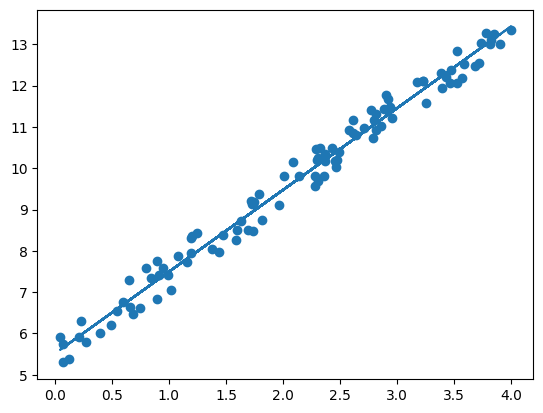

In [21]:
from sklearn.linear_model import LinearRegression

plt.scatter(x,y) # 실제값
plt.plot(x,y_pred)

## 성능 측정

# 오차 행렬 (Confision Matrix)

In [ ]:
from sklearn.metrics import confusion_matrix

## 회귀 모델을 위한 평가 지표

In [ ]:
%reset -f

In [23]:
import numpy as np
import pandas as pd

np.random.seed(20)

# 정답으로 간주
y_true = np.random.randint(low=1, high=999, size=700)

# 학습 후에 예측된 데이터로 간주
y_pred = y_true + np.round(np.random.random(700), decimals=1) * np.random.randint(low=-10, high=10, size=700)

print(y_true.shape, y_pred.shape)

data_df = pd.DataFrame(y_true, columns=['y_true'])

data_df['y_pred'] = y_pred
data_df[data_df['y_true'] > data_df['y_pred']]

data_df.head(20)

(700,) (700,)


y_true  y_pred
0      356   356.2
1      475   470.0
2      272   271.3
3      224   216.8
4      925   924.8
5      219   225.3
6      394   394.6
7      405   405.3
8      844   844.3
9      791   786.1
10     584   584.4
11     163   168.6
12     993   991.4
13     119   117.8
14     553   554.2
15     470   470.3
16     475   470.5
17     795   798.6
18     764   768.0
19     980   982.0

### R2 Score (결정계수)

- 통계학 회귀분석에서 자주 쓰이는 회귀 평가 지표.
- 실제 값의 분산 대비 예측 값의 분산 비율을 나타냅니다.
- 1에 가까울 수록 좋은 모델, 0에 가까울 수록 나쁨, **음수가 나오면 잘못 평가** 되었음을 의미합니다.

![](https://miro.medium.com/max/2812/1*_HbrAW-tMRBli6ASD5Bttw.png)


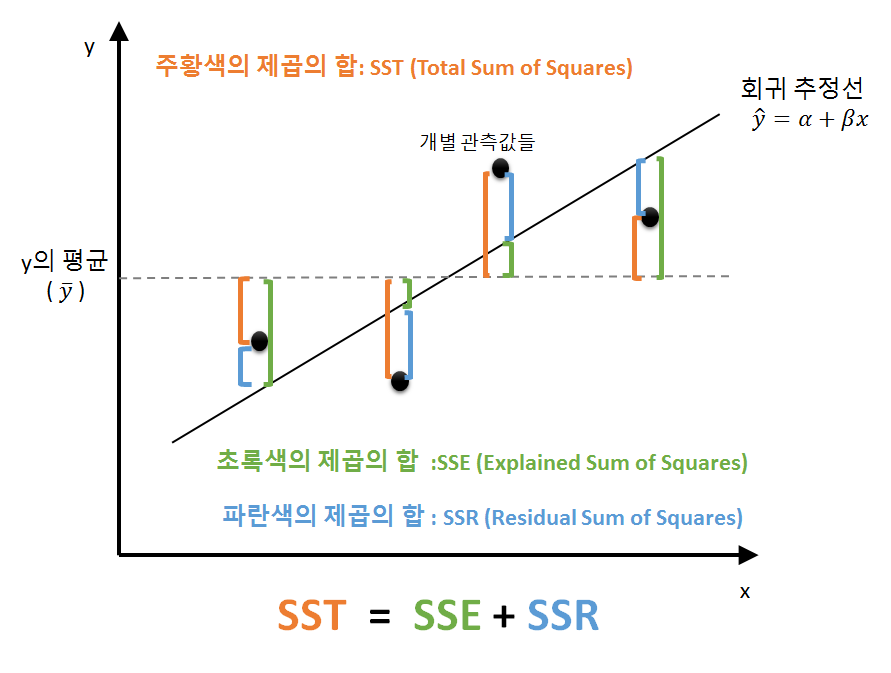


In [25]:
sum(y_true - y_true.mean() **2)

-173187541.41285452

In [27]:
sum((y_true - y_pred)**2)

7722.360000000016

In [28]:
1 - (sum((y_true-y_pred)**2)/ sum((y_true - y_true.mean())**2))

0.999870901727556

In [29]:
from sklearn.metrics import r2_score

r2_score(y_true, y_pred)

0.999870901727556

In [34]:
# 직접 구현해보세요
sum((y_true - y_pred)**2) // len(y_pred)

11.0

### MSE(Mean Squared Error)

- 예측 값과 실제 값의 차이에 대한 **제곱**에 대하여 평균을 낸 값 (음수/양수 구분없이 차이는 차이니까)
- MSE 오차가 작으면 작을수록 좋지만, 과대적합인지 의심해보아야 합니다.
- 예측 값과 실제 값보다 크게 예측이 되는지 작게 예측되는지 알 수 없습니다.

$$ MSE = \frac{1}{n}\sum_{i=1}^{n}(Y_{i}-\hat{Y}_{i})^2 $$

In [ ]:
# 직접 구현해봅니다

In [35]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true, y_pred)

11.031942857142848

### RMSE (Root Mean Squared Error)

- 예측값과 실제값의 차이에 대한 **제곱**에 대하여 평균을 낸 뒤 **루트**를 씌운 값
- MSE의 장단점을 거의 그대로 따라갑니다.
- 제곱 오차에 대한 왜곡을 줄여줍니다.

![](https://miro.medium.com/max/966/1*lqDsPkfXPGen32Uem1PTNg.png)

In [36]:
# 직접 구현해보세요
np.sqrt(sum((y_true - y_pred)**2) / len(y_pred))

3.3214368663490927

In [39]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(y_true, y_pred)

3.321436866349088

### MAE (Mean Absolute Error)

- 예측값과 실제값의 차이에 대한 **절대값**에 대하여 평균을 낸 값
- 실제 값과 예측 값 차이를 절대 값으로 변환해 평균을 계산합니다. 작을수록 좋지만, 과대적합이 될 수 있음에 주의합니다.
- **스케일에 의존적**입니다.

예를 들어, 아파트 집값은 10억, 20억으로 구성되어 있고, 과일 가격은 5000원, 10000원으로 구성되어 있을때,

예측하는 각각 모델의 MSE 가 똑같이 100 이 나왔다고 가정하면 동일한 오차율이 아님에도 불구하고 동일하게 평가되는 오류가 발생합니다.


$$ MAE = \frac{1}{n}\sum_{i=1}^{n}\left|Y_{i}-\hat{Y}_{i}\right| $$

In [40]:
sum(abs(y_true - y_pred)) / len(y_pred)

2.481142857142857

In [41]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true, y_pred)

2.481142857142856

In [42]:
# 아파트 가격 (단위: 만원)
실제_아파트_가격 = np.array([1000000, 2000000])
예측_아파트_가격 = np.array([999900, 2000100])

# 과일 가격
실제_과일_가격= np.array([500, 1000])
예측_과일_가격 = np.array([400, 1100])

In [43]:
아파트_rmse = root_mean_squared_error(실제_아파트_가격, 예측_아파트_가격)
아파트_rmse

100.0

In [44]:
과일_rmse = root_mean_squared_error(실제_과일_가격, 예측_과일_가격)
과일_rmse

100.0

In [45]:
아파트_mse = mean_squared_error(실제_아파트_가격, 예측_아파트_가격)
아파트_mse

10000.0

In [46]:
과일_mse = mean_squared_error(실제_과일_가격, 예측_과일_가격)
과일_mse

10000.0

In [47]:
아파트_mae = mean_absolute_error(실제_아파트_가격, 예측_아파트_가격)
아파트_mae

100.0

In [48]:
과일_mae = mean_absolute_error(실제_과일_가격, 예측_과일_가격)
과일_mae

100.0

In [49]:
# 평균 절대 비율 오차 - Mean Absolute Percentage Error
# (실제값 - 예측값)/실제값 실제값에 대한 오차의 '비율'
from sklearn.metrics import mean_absolute_percentage_error

아파트_mape = mean_absolute_percentage_error(실제_아파트_가격, 예측_아파트_가격)
아파트_mape

7.500000000000001e-05

In [50]:
과일_mape = mean_absolute_percentage_error(실제_과일_가격, 예측_과일_가격)
과일_mape

0.15000000000000002

- 이 값들은 결국에는 오차(Error)이기 때문에 그 값이 작을수록 해당 모델의 성능이 좋다고 평가합니다.


### 보스턴 주택 가격 데이터

* 1978년도 보스턴 외곽 지역의 집값(y)을 보스턴의 506개 조사 구역과 주택 가격에 영향을 주는 13개의 변수와 함께 정리하여 제공
* 해리슨(Harrison, D.)과 루빈펠트(Rubinfeld, D. L.)의 논문 "Hedonic prices and the demand for clean air', J. Environ. Economics & Management"에서 사용된 데이터
* 출처: 카네기 멜론 대학교의 StatLib 라이브러리(http://lib.stat.cmu.edu/datasets/)


|변수| 속성 | 설명 |
|---|------|------|
|x | CRIM | 자치시(town)별 1인당 범죄율 |
|x | ZN | 25,000 평방 피트가 넘는 거주지역 토지 비율 |
|x | INDUS | 자치시(town)별 비소매 상업지역 토지 비율 |
|x | CHAS | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
|x | NOX | 10,000,000당  일산화질소 농도 |
|x | RM | 주택 1가구당 평균 방의 수 |
|x | AGE | 1940년 이전에 건축된 소유주택 비율 |
|x | DIS | 5개의 보스턴 고용 센터까지의 가중 거리 |
|x | RAD | 방사형 고속도로 접근성 지수 |
|x | TAX | 10,000 달러당 재산 세율 |
|x | PTRATIO | 자치시(town)별 학생/교사 비율 |
|x | B | 1000(Bk-0.63)^2, Bk는 자치시별 흑인 비율을 의미 |
|x | LSTAT | 모집단의 하위계층 비율(%) |
|y | PRICE | 소유자가 거주하는 주택가격(중앙값) (단위: $1,000) |

![](

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

%matplotlib inline


import numpy as np
import pandas as pd

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
x =pd.DataFrame(data, columns=['CRIM','ZN','INDUS','CHAS', 'NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
y = pd.DataFrame(target, columns=['PRICE'])

bostonDF = x
bostonDF['PRICE'] = y
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [52]:
bostonDF

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8  392.83   4.03   34.7  
3       18.7  394.63   2.94   33.4  
4       18.7  396.90   5.33   36.2  
..       ...     ...    ...    ...  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  

[506 rows x 14 columns]

In [53]:
bostonDF.describe().T

count        mean         std        min         25%        50%  \
CRIM     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
CHAS     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
B        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
LSTAT    506.0   12.653063    7.141062    1.73000    6.950000   11.36000   
PRICE    506.0   22.532806    9.197104    5.00000   17.025000   21.20000   

                75%       max  
CRIM       3.677083   88.9762  
ZN        12.500000  100.0000  
INDUS     18.100000   27.7400  
CHAS       0.000000    1.0000  
NOX        0.624000    0.8710  
RM         6.623500    8.7800  
AGE       94.075000  100.0000  
DIS        5.188425   12.1265  
RAD       24.000000   24.0000  
TAX      666.000000  711.0000  
PTRATIO   20.200000   22.0000  
B        396.225000  396.9000  
LSTAT     16.955000   37.9700  
PRICE     25.000000   50.0000

In [54]:
bostonDF.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [58]:
# 1. 단위가 서로 다르니 - scaling 해봐야겠다
# 2. 506개 밖에 없는데 13개의 특성과의 관계를 추론하는 회귀선을 만들어야 하니 영향이 있어보이는 함수들만 따로 추려서
# w1xw + ... + w13x13 + bias = yhat
bostonDF.corr()["PRICE"].sort_values()
# CRIM -0.38 -> 음수로서의 영향력

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
PRICE      1.000000
Name: PRICE, dtype: float64

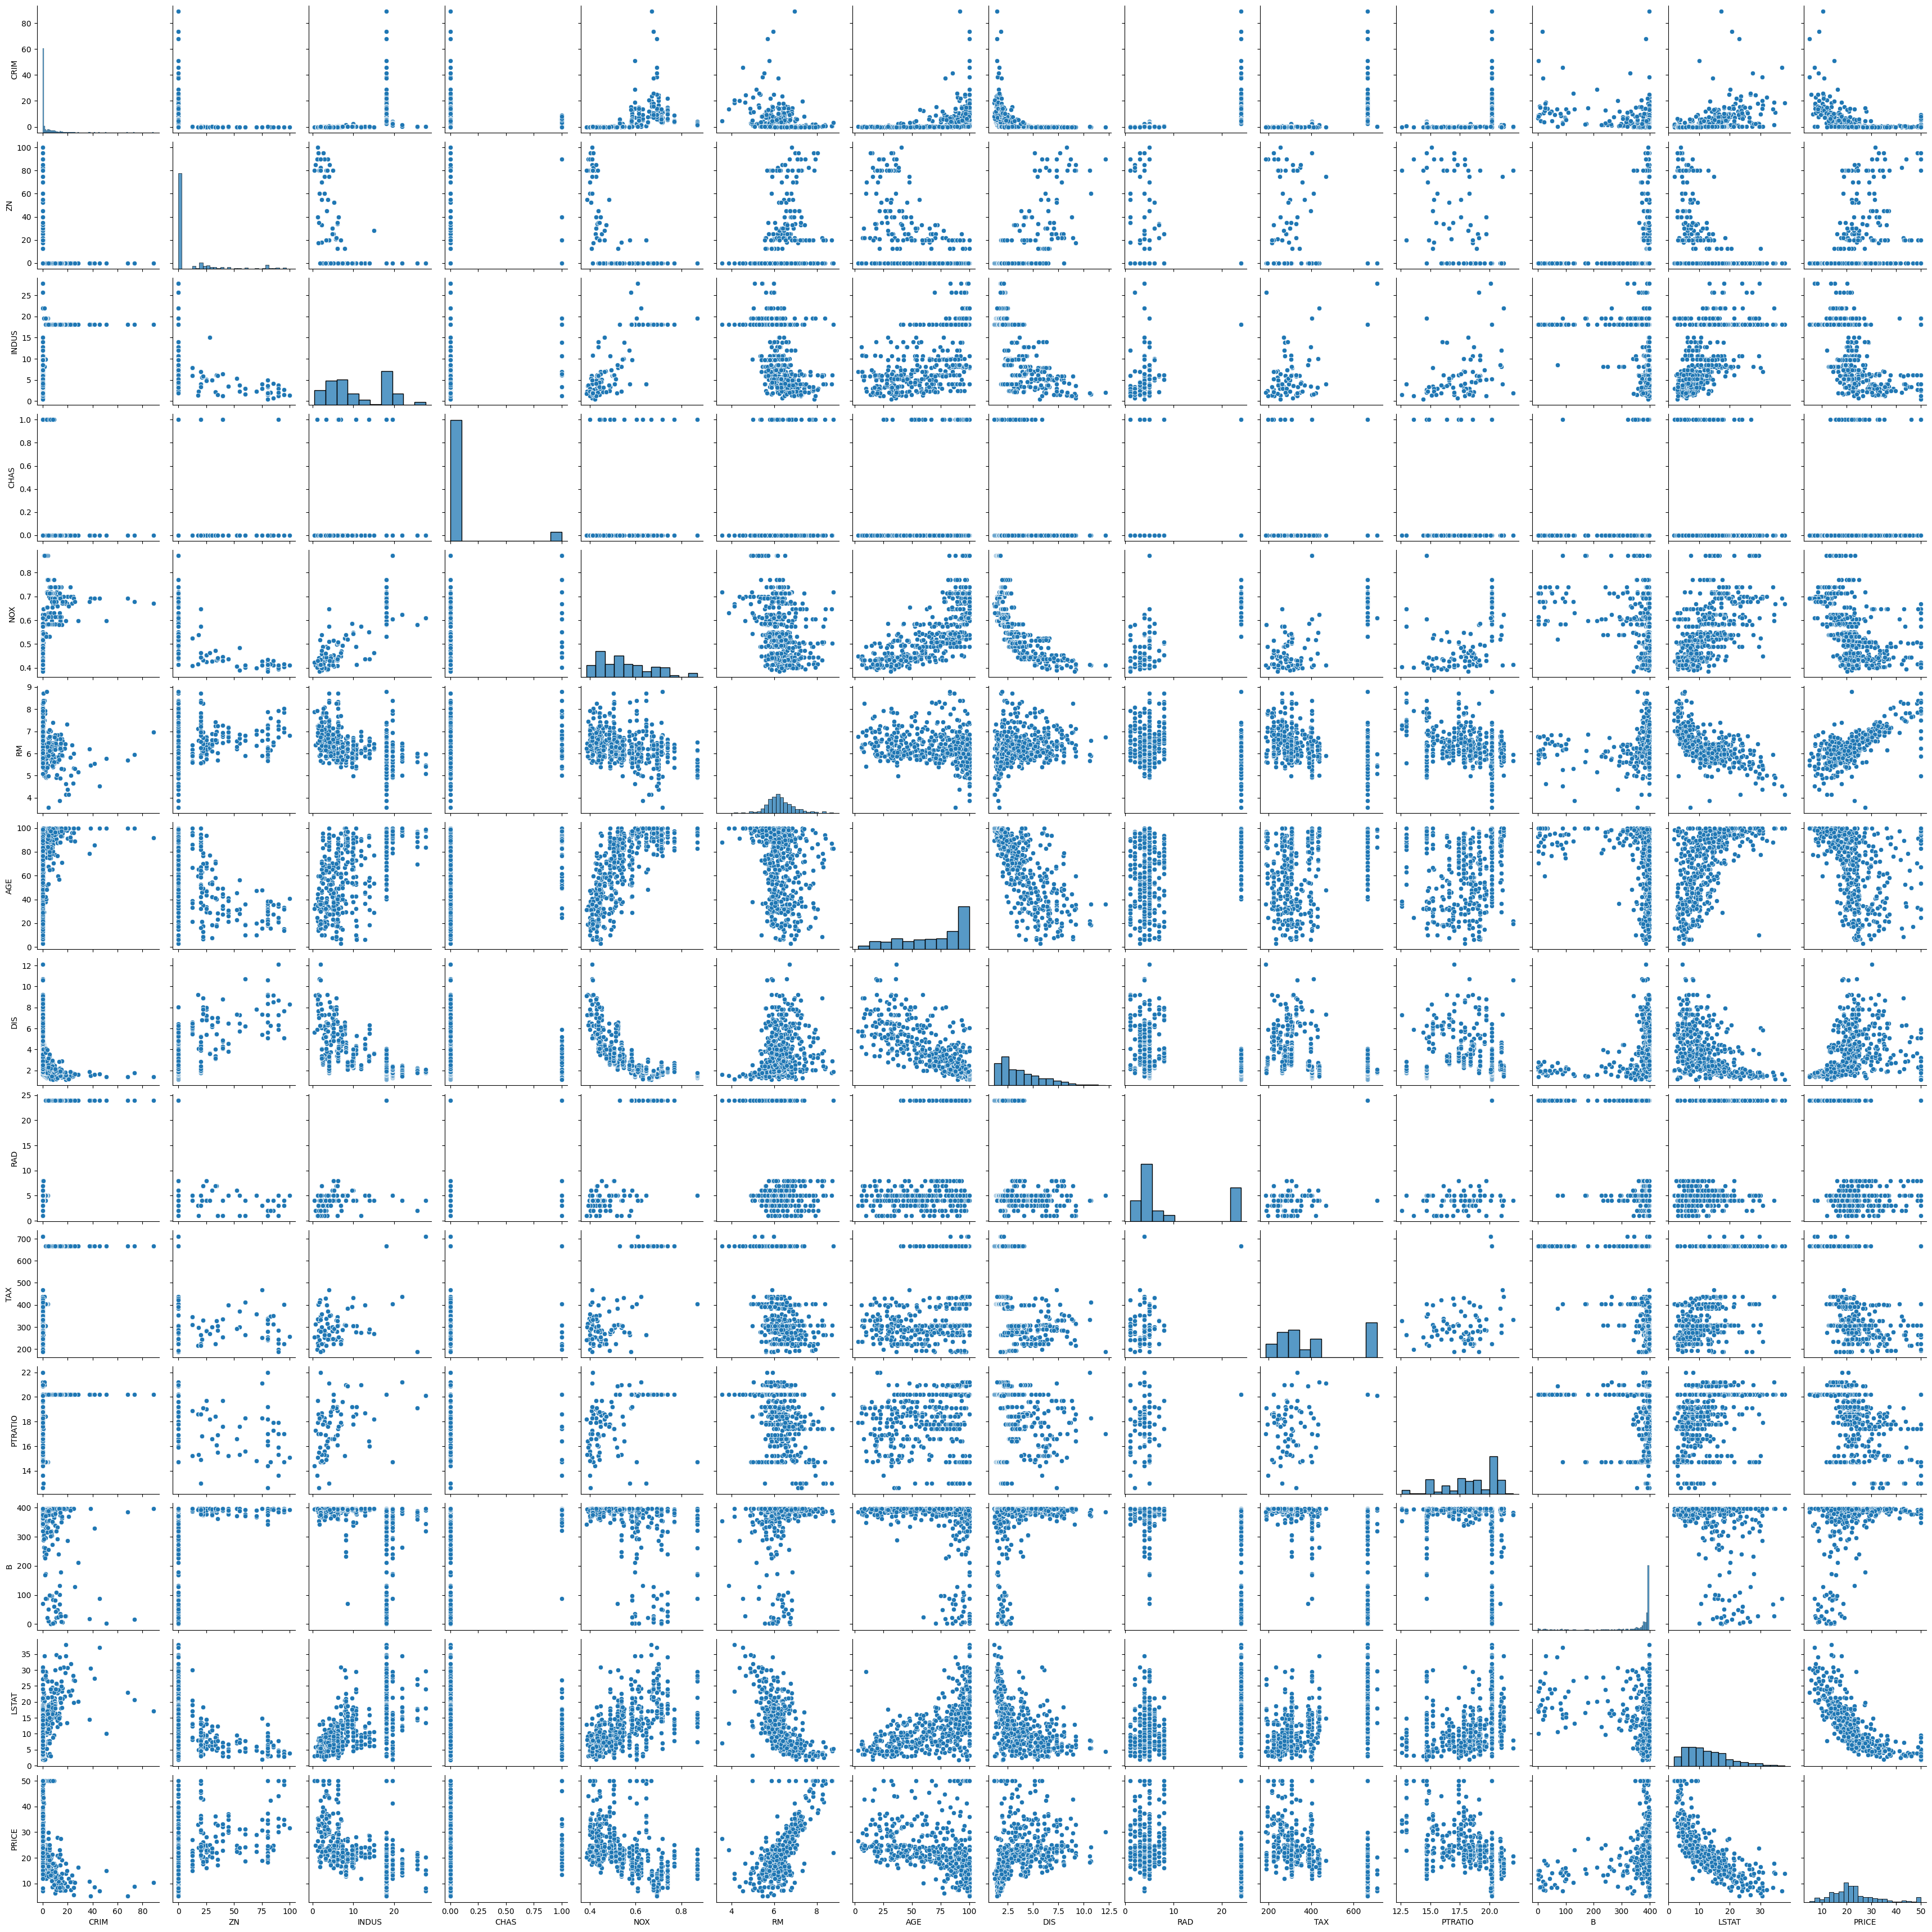

In [57]:
import seaborn as sns
sns.pairplot(bostonDF)

#  이 데이터를 가장 잘 설명할 수 있는 회귀모델을 만들겁니다

- 데이터를 수집
- 전처리(scaling, 문자열로 된 데이터를 수치화, 데이터들 중에 버려도 될 특성을 버린다든가)
- 모델 돌려봄(baseline) 가장 처음 기준으로 삼는 모델
    - 데이터에 새로운 전처리
    - 모델 바꿔보고
    - 특성을 제거하거나, 추가하거나
    - 모델 바꿔보고

## 1) baseline 모델 만들기

In [60]:
# LinearRegression 모델을 만드셔서 bostonDF의 PRICE 종속변수(y), 나머지 특성들을 독립변수(X)로 나누고
# 그중의 0.2 정도만 test 데이터로 사용해 주세요 random_state=121  -> 어느정도의 r2_score 나오는지까지 확인

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 'PRICE' 정답지를 알고 있기 때문에 드랍해줌
x = x.drop('PRICE', axis=1)

# 연속변수를 나눌 때도 shuffle=True를 해야할까?
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, shuffle=True)

li_model = LinearRegression()
li_model.fit(X_train, y_train)
li_model.score(X_test, y_test) # 기저모델 0.80

0.8081443918471969

In [61]:
li_model.coef_ # 한쪽으로 쏠려있거나, 훈련데이터의 특성 개수가 늘어날수록 r2_score는 높아질 수밖에 없음
# 변수가 늘어날수록 설명력이 커지기 때문

array([[ -0.109245,   0.037962,   0.056877,   3.595275, -20.325921,
          3.528061,  -0.002063,  -1.434218,   0.280869,  -0.010528,
         -0.954045,   0.00885 ,  -0.525624]])

In [62]:
li_model.intercept_

array([38.923444])

In [63]:
y_pred = li_model.predict(X_test)


In [64]:
from sklearn.metrics import mean_squared_error

# 제곱을 해서 각 오차를 합해서 오차개수로 나눈 값 -> 회귀선과 멀리 떨어져있는 점에 가중치를 크게 줘서 오차를 계산하게 됩니다.
root_mean_squared_error(y_test, y_pred)

4.201292018306383

In [65]:
import joblib
# dump -> 저장 load -> 불러옵니다
# 파이썬의 객체를 바이너리 타입으로 저장하는 pickle 방식을 이용합니다

joblib.dump(li_model, 'baseline.joblib')

['baseline.joblib']

In [67]:
import joblib

li_model2 = joblib.load('baseline.joblib')
li_model2.score(X_test, y_test)

0.8081443918471969

In [ ]:
# 데이터를 두개로 분리하고 모델을 생성 및 검증해보세요

In [ ]:
np.set_printoptions(precision=6, suppress=True)

pd.options.display.float_format = '{:.5f}'.format
pd.reset_option('display.float_format')

## 1) 베이스라인보다 좋은 모델을 만들기 위해 Scaling

In [86]:
# 회귀모델들은 이미 정규분포를 가정하도록 알고리즘이 짜여져 있습니다
# 오히려 효과가 떨어짐
# 대부분의 sklearn 알고리즘은
# 회귀모델들은 이미 정규분포를 가정하도록 알고리즘이 짜여져 있음
np.set_printoptions(precision=6, suppress=True)

pd.options.display.float_format = '{:.5f}'.format
pd.reset_option('display.float_format')
# 1. 데이터 차원 (스케일링, 특성 중에 필요없는 걸 빼볼까 등등 )
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = bostonDF.iloc[:, :-1]
y = bostonDF.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121 )


# scaling을 할 때는 test 데이터의 정보를 아예 몰라야함
sc = RobustScaler()

sc = StandardScaler()
sc.fit(X_train) # mean_, var_, scale_ 이 생겨남
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

li_model2 = LinearRegression()
li_model2.fit(X_train_std, y_train)
li_model2.score(X_test_std, y_test) # 0.64 => 오히려 떨어짐

y_pred = li_model2.predict(X_test_std)
root_mean_squared_error(y_test, y_pred) # 5.12

5.125685647667983

## 데이터 차원 2 - 특성 중에 필요없는 걸 빼볼까

INDUS     RM  PTRATIO    TAX  LSTAT
503  11.93  6.976     21.0  273.0   5.64
100   8.56  6.727     20.9  384.0   9.42
230   6.20  5.981     17.4  307.0  11.65
48    6.91  5.399     17.9  233.0  30.81
308   9.90  6.635     18.4  304.0   4.54
..     ...    ...      ...    ...    ...
500   9.69  6.027     19.2  391.0  14.33
95    2.89  6.625     18.0  276.0   6.65
264   3.97  7.206     13.0  264.0   8.10
469  18.10  5.713     20.2  666.0  14.76
322   7.38  6.041     19.6  287.0   7.70

[404 rows x 5 columns]

In [72]:
# 1. 13개 특성 중에 실제 관련 있어보이는 특성만을 취하는 이유
# 506개 -> w1x1.. w7x7 + b = yhat - 모델의 복잡도를 감소시킴
# 2. 도메인 지식 별로 없음.

# 같은 인덱스 - 같은 데이터 조건
X_train2 = X_train[['LSTAT', 'PTRATIO', 'INDUS', 'RM', 'NOX', 'ZN', 'CRIM']]
X_test2 = X_test[['LSTAT', 'PTRATIO', 'INDUS', 'RM', 'NOX', 'ZN', 'CRIM']]

li_model3 = LinearRegression()
li_model3.fit(X_train2, y_train)
print(li_model3.score(X_test2, y_test))

y_pred = li_model3.predict(X_test2)
print(root_mean_squared_error(y_test, y_pred))
# 0.5927494787963599, 5.50092530976728
# 성능이 오히려 나빠짐.

0.5927494787963599
5.50092530976728


In [73]:
from sklearn.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(li_model)
sfs.fit(x, y)

SequentialFeatureSelector(estimator=LinearRegression())

In [74]:
dir(sfs)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_get_best_new_feature_score',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_support_mask',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_transform',
 '_validate_data',
 '_valid

In [76]:
sfs.feature_names_in_

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype=object)

In [79]:
sfs.support_ # 'CRIM' 'CHAS' 'RM' 'PTRATIO' 'B', 'LSTAT'

array([ True, False, False,  True, False,  True, False, False, False,
       False,  True,  True,  True])

In [80]:
X_train3 = X_train.iloc[:, sfs.support_]
X_test3 = X_test.iloc[:, sfs.support_]

In [81]:
li_model3 = LinearRegression()
li_model3.fit(X_train3, y_train)
li_model3.score(X_test3, y_test) # 0.6223055667425974

0.5793100523428161

In [82]:
y_pred = li_model3.predict(X_test3)
root_mean_squared_error(y_test, y_pred) # 6.107320410610123

5.590954928495712

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector



|변수| 속성 | 설명 |
|---|------|------|
|x | CRIM | 자치시(town)별 1인당 범죄율 |
|x | ZN | 25,000 평방 피트가 넘는 거주지역 토지 비율 |
|x | INDUS | 자치시(town)별 비소매 상업지역 토지 비율 |
|x | CHAS | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
|x | NOX | 10,000,000당  일산화질소 농도 |
|x | RM | 주택 1가구당 평균 방의 수 |
|x | AGE | 1940년 이전에 건축된 소유주택 비율 |
|x | DIS | 5개의 보스턴 고용 센터까지의 가중 거리 |
|x | RAD | 방사형 고속도로 접근성 지수 |
|x | TAX | 10,000 달러당 재산 세율 |
|x | PTRATIO | 자치시(town)별 학생/교사 비율 |
|x | B | 1000(Bk-0.63)^2, Bk는 자치시별 흑인 비율을 의미 |
|x | LSTAT | 모집단의 하위계층 비율(%) |
|y | MEDV | 소유자가 거주하는 주택가격(중앙값) (단위: $1,000) |

# Baseline 모델 - 기준치
```
r2_score = 0.6464147921756027
rmse = 5.1256856476679875
```

# 실습. 테스트셋을 여러개로 구성하여 교차 검증을 진행해보세요.
    cross_val_score(), K-Fold(), Stratify K-Fold() 사용

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

kfold = KFold(shuffle=True, random_state=121)
li_model = LinearRegression()

cv_list = cross_val_score(li_model, X, y, cv=kfold, scoring='r2')
cv_list
##  5개로 fold를 나눠서 교차검증을 수행해 보십시오
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter


array([0.646415, 0.673302, 0.749199, 0.703678, 0.75527 ])

In [84]:
cv_list.mean() # 0.7055726478749108, 4.945310071144711

0.7055726478749108

In [85]:
# 회귀 모델의 지표는 값이 작을수록 좋은 지표
abs(cross_val_score(li_model, X, y, cv=kfold, scoring='neg_root_mean_squared_error')).mean() # rmse

4.945310071144711

# 성능개선

1. Feature Scaling
2. Feature Selection
3. 모델변경

# 3-1) Ridge, Lasso 모델 적용
- 다중 선형 회귀 모델은 필요이상으로 자세하게 특징값과 라벨값의 관계를 분석하기 때문에 일반화 능력(범용능력)이 떨어져 새로운 데이터를 제대로 예측하지 못하게 되는 **과적합(overfitting)** 경향이 있습니다.
- 이를 해결하기 위해 1) 기존대로 MSE가 최소가 되게 하는 가중치와 편향을 찾으면서 새롭게 2) **가중치들의 제곱합(릿지) 혹은 절댓값의 합(라쏘)이 최소가 되게 하는 규제**를 주어 과적합을 극복합니다.

![](https://miro.medium.com/max/1058/1*Jd03Hyt2bpEv1r7UijLlpg.png)

## 가. Lasso

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbQsMdI%2FbtqFtif3UBd%2FaVU5KbjGskDL900rnBo4c0%2Fimg.png)

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbnYfuy%2FbtqFroH63Bw%2FV2ahptGHJhnRnJ28c6sBdK%2Fimg.png)

- 제약 조건을 통해 일반화된 모형을 찾는다
- 가중치들이 0이 되게 함으로써 그에 해당하는 특성들을 제외해준다. 결과적으로 모델에서 가장 중요한 특성이 무엇인지 알게되는 등 모델 해석력이 좋아진다.


In [87]:
from sklearn.linear_model import Lasso # 절대값
X = bostonDF.iloc[:, :-1]
y = bostonDF.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121 )

la_model = Lasso(alpha=10) # alpha: penalty의 크기: LogisticRession의 C와 같으나 거기서는 역수, 여기는 비례해서
la_model.fit(X_train, y_train)
print(la_model.score(X_test, y_test)) # 0.6737378019122908
print(root_mean_squared_error(y_test, la_model.predict(X_test))) # 5.676279762775778
print(la_model.intercept_)
print(la_model.coef_)

0.4676575867850473
6.289273169274208
30.055883390718844
[-0.        0.02508  -0.        0.       -0.        0.        0.
 -0.        0.       -0.009651 -0.        0.008528 -0.552776]


In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge

%matplotlib inline


import numpy as np
import pandas as pd

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
x =pd.DataFrame(data, columns=['CRIM','ZN','INDUS','CHAS', 'NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
y = pd.DataFrame(target, columns=['PRICE'])

bostonDF = x
bostonDF['PRICE'] = y

X = bostonDF.iloc[:, :-1]
y = bostonDF.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121 )

la_model = Lasso(alpha=10) # alpha: penalty의 크기: LogisticRession의 C와 같으나 거기서는 역수, 여기는 비례해서
la_model.fit(X_train, y_train)
print(la_model.score(X_test, y_test)) # 0.6737378019122908
print(root_mean_squared_error(y_test, la_model.predict(X_test))) # 5.676279762775778
print(la_model.intercept_)
print(la_model.coef_)

0.4676575867850473
6.289273169274208
30.055883390718844
[-0.        0.02508  -0.        0.       -0.        0.        0.
 -0.        0.       -0.009651 -0.        0.008528 -0.552776]


In [89]:
''' 일반 li_model
 -0.109245x1 +  0.037962x2 +   0.056877x3 + 3.595275, -20.325921,
          3.528061,  -0.002063,  -1.434218,   0.280869,  -0.010528,
         -0.954045,   0.00885 ,  -0.525624x13 + 38.923444 = yhat
'''
la_model.coef_ # [-0.078294,  0.054994, -0.      ,  0.      , -0.      ,  1.143935,
        #0.012046, -0.667051,  0.292021, -0.016184, -0.751412,  0.008448,
       # -0.675042]

array([-0.      ,  0.02508 , -0.      ,  0.      , -0.      ,  0.      ,
        0.      , -0.      ,  0.      , -0.009651, -0.      ,  0.008528,
       -0.552776])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[-0.        0.02508  -0.        0.       -0.        0.        0.
 -0.        0.       -0.009651 -0.        0.008528 -0.552776]
30.055883390718844


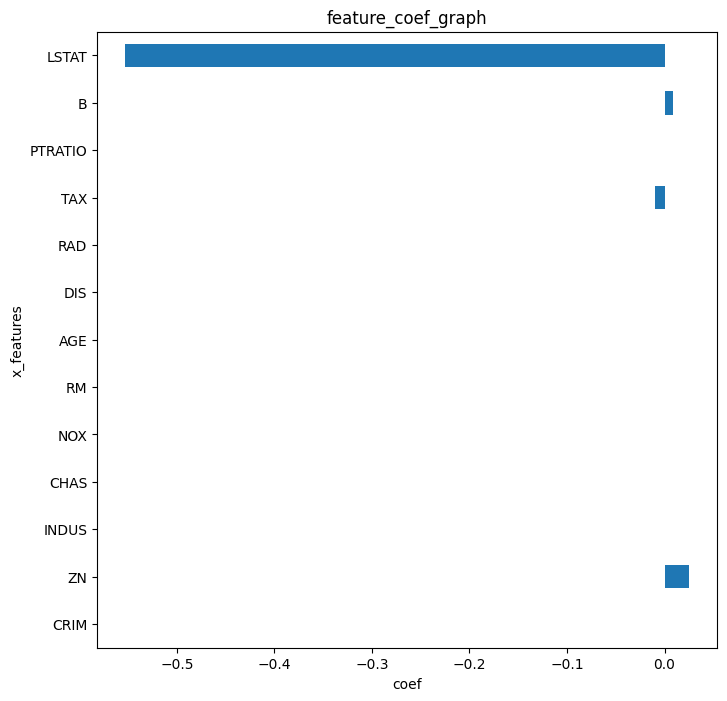

In [93]:
print(la_model.feature_names_in_) # 각 항목
print(la_model.coef_) # 학습된 계수를 확인할 수 있음
print(la_model.intercept_) # y절편

# data 시각화
# figure size
plt.rcParams['figure.figsize'] = [8, 8] #rcparams를 이용한 그래프 설정 변환

# graph values
coefs = la_model.coef_.tolist() #list로 변환
coefs_series = pd.Series(coefs) #pandas로 변환하기 위해 series로 변환

# graph info
x_labels = la_model.feature_names_in_ #위에서 정의된 feature
ax = coefs_series.plot.barh() # 바 그래프
ax.set_title('feature_coef_graph')
ax.set_xlabel('coef')
ax.set_ylabel('x_features')
ax.set_yticklabels(x_labels)
plt.show()

## 나. Ridge
- 릿지의 가중치들은 0에 가까워질 뿐 0이 되지는 않는다.

- 이로 인해 특성이 많은데 그중 일부분만 중요하다면 라쏘가, 특성의 중요도가 전체적으로 비슷하다면 릿지가 좀 더 괜찮은 모델을 찾게 된다..

In [95]:
from sklearn.linear_model import Ridge  # 제곱합

ri_model = Ridge(alpha=10)
ri_model.fit(X_train, y_train)
print(ri_model.score(X_test, y_test)) # 0.6901406622728391
root_mean_squared_error(y_test, ri_model.predict(X_test)) # 5.531752073833912


0.635941148917731


5.4537372227603775

In [97]:
print(ri_model.feature_names_in_) # 각 항목
print(ri_model.coef_) # 학습된 계수를 확인할 수 있음
print(ri_model.intercept_) # y절편

# data 시각화
# figure size
plt.rcParams['figure.figsize'] = [8, 8] #rcparams를 이용한 그래프 설정 변환

# graph values
coefs = ri_model.coef_.tolist() #list로 변환
coefs_series = pd.Series(coefs) #pandas로 변환하기 위해 series로 변환

# graph info
x_labels = la_model.feature_names_in_ #위에서 정의된 feature
ax = coefs_series.plot.barh() # 바 그래프
ax.set_title('feature_coef_graph')
ax.set_xlabel('coef')
ax.set_ylabel('x_features')
ax.set_yticklabels(x_labels)
plt.show()

AttributeError: 'Ridge' object has no attribute 'feature_names_in_'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 8.5 MB/s eta 0:00:00


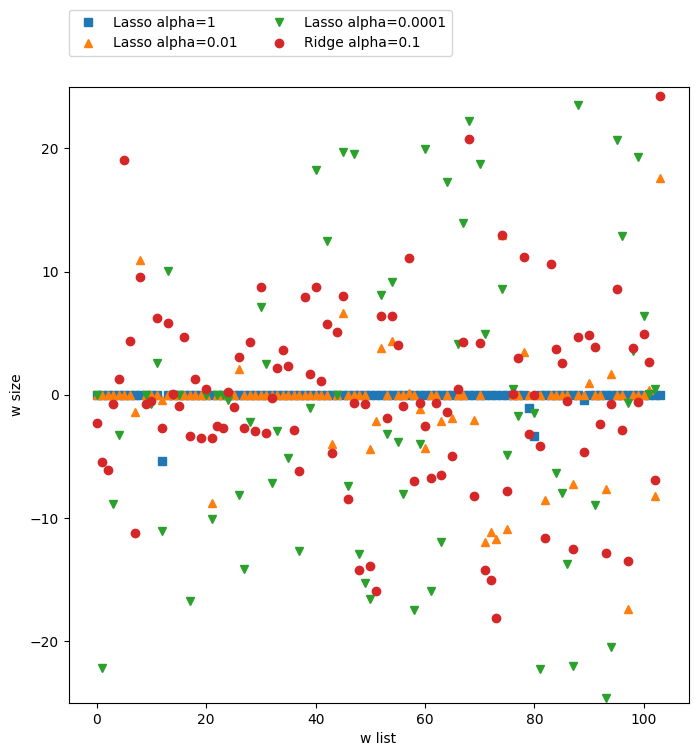

In [94]:
!pip install mglearn

import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 릿지 회귀
ridge = Ridge().fit(X_train, y_train)
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

# 라쏘 회귀
lasso = Lasso().fit(X_train, y_train)
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.xlabel("w list")
plt.ylabel("w size")

# plt.hlines(0, 0, len(lr.coef_))

plt.ylim(-25, 25)

plt.show()

# Auto ML

In [98]:
bostonDF.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [99]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.9/109.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 28.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of flask to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.1 MB/s eta 0:00:00
  Preparing met

In [2]:
# import pycaret regression and init setup
from pycaret.regression import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge

%matplotlib inline


import numpy as np
import pandas as pd

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
x =pd.DataFrame(data, columns=['CRIM','ZN','INDUS','CHAS', 'NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
y = pd.DataFrame(target, columns=['PRICE'])

bostonDF = x
bostonDF['PRICE'] = y

s = setup(bostonDF, target = 'PRICE', session_id = 123)

In [3]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(bostonDF, target = 'PRICE', session_id = 123)

In [4]:
best = compare_models()

Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [5]:
best
# Extra Trees Regressor - 여러개의 결정트리를 무작위로 만들어서 예측을 하는 앙상블 모델
# 다수결로 최종결과를 산출 - 1. 안정성, 2. 여러개의 모델의 평가를 거치기 때문에 새로 보는 데이터에 대한 판단 성능이 더 좋아지기 마련


ExtraTreesRegressor(n_jobs=-1, random_state=123)

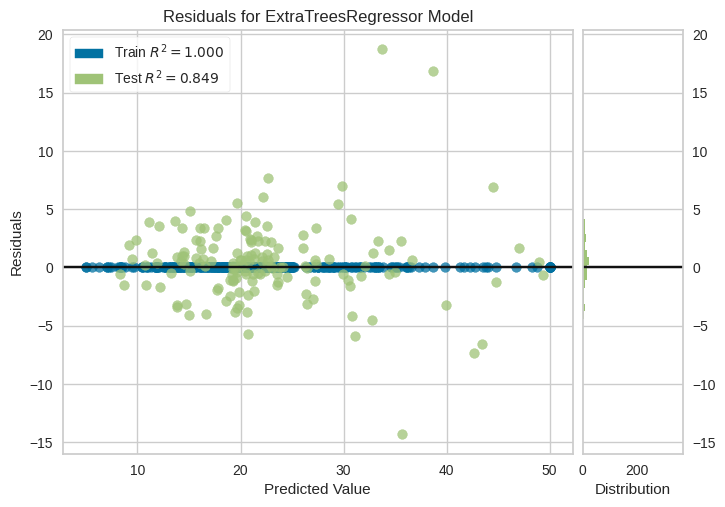

In [6]:
# best = create_model('et')
# plot residuals
plot_model(best, plot = 'residuals')

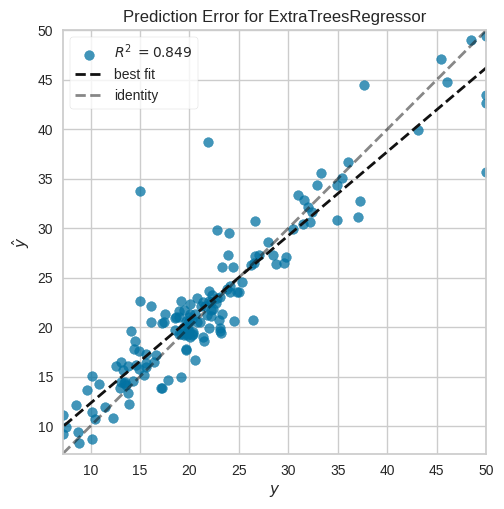

In [7]:
# plot error
plot_model(best, plot = 'error')

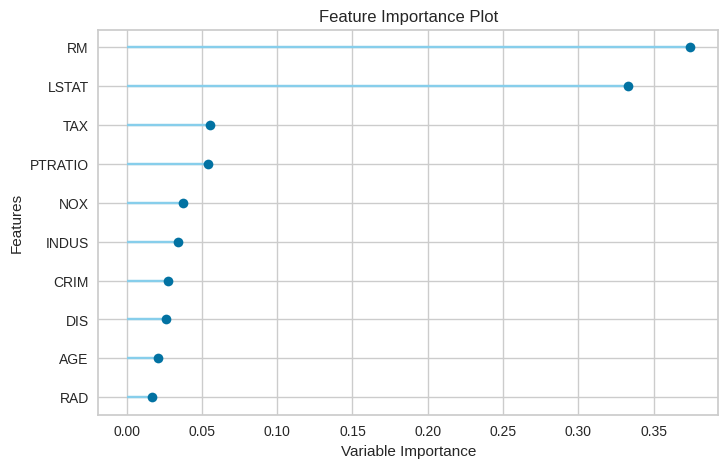

In [8]:
plot_model(best, plot = 'feature')

In [9]:
best

ExtraTreesRegressor(n_jobs=-1, random_state=123)

In [10]:
# 하이퍼파라미터보다는 모델을 선정할 때에 포커싱이 되어있는 패키지입니다.
# tune hyperparameters of dt
tuned_dt = tune_model(best)

# 2.0378	9.4958	2.9283	0.8884	0.1298	0.1000
# 2.3879	12.9716	3.4367	0.8488	0.1543	0.1203

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [11]:
get_config()

# 모델 속성 확인
print("n_features_in_:", getattr(tuned_dt, 'n_features_in_', 'Not available'))
print("n_estimators:", getattr(tuned_dt, 'n_estimators', 'Not available'))
print("max_depth:", getattr(tuned_dt, 'max_depth', 'Not available'))
print("min_samples_split:", getattr(tuned_dt, 'min_samples_split', 'Not available'))
print("min_samples_leaf:", getattr(tuned_dt, 'min_samples_leaf', 'Not available'))
print("max_features:", getattr(tuned_dt, 'max_features', 'Not available'))
print("bootstrap:", getattr(tuned_dt, 'bootstrap', 'Not available'))
print("criterion:", getattr(tuned_dt, 'criterion', 'Not available'))

n_features_in_: 13
n_estimators: 100
max_depth: None
min_samples_split: 2
min_samples_leaf: 1
max_features: 1.0
bootstrap: False
criterion: squared_error


In [12]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12], 'n_estimators': [50, 100, 150, 200]}

# tune model with custom grid and metric = RMSE
tuned_dt = tune_model(best, custom_grid = dt_grid, optimize = 'RMSE') # 2.9125	0.8897

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [13]:
# 2.0378	9.4958	2.9283	0.8884	0.1298	0.1000 : baseline
# 2.3879	12.9716	3.4367	0.8488	0.1543	0.1203	: pycaret이 시도했으나 실패
# 2.0207	9.4128	2.9125	0.8897	0.1295	0.0993  : grid search 시켰을 때


# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(best, custom_grid = dt_grid, optimize = 'RMSE',  return_tuner=True)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [14]:
# AutoML을 하면 탐색하는 범위 안에서 최적의 모델은 찾을 수 있다
# 정밀한 하이퍼파라미터 튜닝은 불가능하다.
# model object
tuned_dt

ExtraTreesRegressor(n_estimators=150, n_jobs=-1, random_state=123)

In [15]:

# 모델 속성 확인
print("n_features_in_:", getattr(tuned_dt, 'n_features_in_', 'Not available'))
print("n_estimators:", getattr(tuned_dt, 'n_estimators', 'Not available'))
print("max_depth:", getattr(tuned_dt, 'max_depth', 'Not available'))
print("min_samples_split:", getattr(tuned_dt, 'min_samples_split', 'Not available'))
print("min_samples_leaf:", getattr(tuned_dt, 'min_samples_leaf', 'Not available'))
print("max_features:", getattr(tuned_dt, 'max_features', 'Not available'))
print("bootstrap:", getattr(tuned_dt, 'bootstrap', 'Not available'))
print("criterion:", getattr(tuned_dt, 'criterion', 'Not available'))


n_features_in_: 13
n_estimators: 150
max_depth: None
min_samples_split: 2
min_samples_leaf: 1
max_features: 1.0
bootstrap: False
criterion: squared_error


In [16]:
# tuner object
tuner

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['CRIM',
                                                                          'ZN',
                                                                          'INDUS',
                                                                          'CHAS',
                                                                          'NOX',
                                                                          'RM',
                                                                          'AGE',
                                                                          'DIS',
                                                                          'RAD',
                                                                          'TAX',
                                                                          'PTRATIO',
                                                                          'B',
                                                                          'LSTAT'],
                                                                 transformer=SimpleImputer())),
                                             ('categorical_imputer',
                                              TransformerWrapper(include=[],
                                                                 transformer=SimpleImputer(strategy='most_frequent'))),
                                             ('actual_estimator',
                                              ExtraTreesRegressor(n_jobs=-1,
                                                                  random_state=123))]),
                   n_jobs=-1,
                   param_distributions={'actual_estimator__max_depth': [None, 2,
                                                                        4, 6, 8,
                                                                        10,
                                                                        12],
                                        'actual_estimator__n_estimators': [50,
                                                                           100,
                                                                           150,
                                                                           200]},
                   random_state=123, refit=False,
                   scoring='neg_root_mean_squared_error', verbose=1)

In [17]:
# tune dt using optuna, ray라는 패키지를 하이퍼파라미터 튜닝에 많이 씁니다.
tuned_dt = tune_model(best, search_library = 'optuna')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

INFO:optuna_integration.sklearn.sklearn:Searching the best hyperparameters using 354 samples...
INFO:optuna_integration.sklearn.sklearn:Finished hyperparameter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [18]:

# 모델 속성 확인
print("n_features_in_:", getattr(tuned_dt, 'n_features_in_', 'Not available'))
print("n_estimators:", getattr(tuned_dt, 'n_estimators', 'Not available'))
print("max_depth:", getattr(tuned_dt, 'max_depth', 'Not available'))
print("min_samples_split:", getattr(tuned_dt, 'min_samples_split', 'Not available'))
print("min_samples_leaf:", getattr(tuned_dt, 'min_samples_leaf', 'Not available'))
print("max_features:", getattr(tuned_dt, 'max_features', 'Not available'))
print("bootstrap:", getattr(tuned_dt, 'bootstrap', 'Not available'))
print("criterion:", getattr(tuned_dt, 'criterion', 'Not available'))

n_features_in_: 13
n_estimators: 100
max_depth: None
min_samples_split: 2
min_samples_leaf: 1
max_features: 1.0
bootstrap: False
criterion: squared_error


In [19]:
import optuna
from sklearn.ensemble import ExtraTreesRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1. 데이터 import
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
X =pd.DataFrame(data, columns=['CRIM','ZN','INDUS','CHAS', 'NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
y = pd.DataFrame(target, columns=['PRICE'])

bostonDF = X
bostonDF['PRICE'] = y

# 2. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 목적 함수 정의
def objective(trial):
    # 하이퍼파라미터를 탐색할 범위 설정
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)

    # 모델 생성
    model = ExtraTreesRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  min_samples_split=min_samples_split,
                                  random_state=42)

    # 모델 훈련
    model.fit(X_train, y_train)

    # 예측 및 성능 평가
    y_pred = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred)

    return rmse

# 4. Optuna의 Study 생성 및 최적화 실행
study = optuna.create_study(direction='minimize') # 값이 작을 수록 좋은 성능평가지표라면 minimize, 값이 클수록 좋은 성능평가지표라면 maximize라고 적습니다.
study.optimize(objective, n_trials=50)

# 5. 최적 하이퍼파라미터 출력
print('Best parameters:', study.best_params)
print('Best RMSE:', study.best_value)

Best parameters: {'n_estimators': 151, 'max_depth': 50, 'min_samples_split': 2}
Best RMSE: 0.11034595117523137


In [20]:
study.trials_dataframe

<bound method Study.trials_dataframe of <optuna.study.study.Study object at 0x79e8aeab42d0>>

In [21]:
!pip install optuna-dashboard

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 7.7 MB/s eta 0:00:00


In [22]:
!pip install localtunn

ERROR: Could not find a version that satisfies the requirement localtunn (from versions: none)
ERROR: No matching distribution found for localtunn


In [ ]:
import optuna
import threading
from google.colab import output
from optuna_dashboard import run_server

# 3. 목적 함수 정의
def objective(trial):
    # 하이퍼파라미터를 탐색할 범위 설정
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)

    # 모델 생성
    model = ExtraTreesRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  min_samples_split=min_samples_split,
                                  random_state=42)

    # 모델 훈련
    model.fit(X_train, y_train)

    # 예측 및 성능 평가
    y_pred = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred)

    return rmse

# 4. Optuna의 Study 생성 및 최적화 실행
storage = optuna.storages.InMemoryStorage()
study = optuna.create_study(storage=storage, direction='minimize')
study.optimize(objective, n_trials=30)

# Start Optuna Dashboard
port = 8081
thread = threading.Thread(target=run_server, args=(storage,), kwargs={"port": port})
thread.start()

import urllib
print("Password/Enpoint IP :",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))
!npx localtunnel --port 8081

Bottle v0.13.2 server starting up (using WSGIRefServer())...
Listening on http://localhost:8081/
Hit Ctrl-C to quit.



Password/Enpoint IP : 34.80.84.189
⠙⠹⠸⠼⠴Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇your url is: https://all-worlds-strive.loca.lt
118.131.63.236
118.131.63.236


127.0.0.1 - - [27/Feb/2025 06:34:10] "GET / HTTP/1.1" 302 0
127.0.0.1 - - [27/Feb/2025 06:34:11] "GET /dashboard HTTP/1.1" 200 4145
127.0.0.1 - - [27/Feb/2025 06:34:11] "GET /static/bundle.js HTTP/1.1" 200 4158971
127.0.0.1 - - [27/Feb/2025 06:34:14] "GET /api/studies HTTP/1.1" 200 162
127.0.0.1 - - [27/Feb/2025 06:34:20] "GET /api/studies/0/param_importances HTTP/1.1" 200 295
127.0.0.1 - - [27/Feb/2025 06:34:20] "GET /favicon.ico HTTP/1.1" 200 7670
127.0.0.1 - - [27/Feb/2025 06:34:20] "GET /api/studies/0?after=0 HTTP/1.1" 200 29564
127.0.0.1 - - [27/Feb/2025 06:34:31] "GET /api/studies/0?after=30 HTTP/1.1" 200 1934
127.0.0.1 - - [27/Feb/2025 06:34:42] "GET /api/studies/0?after=30 HTTP/1.1" 200 1934
127.0.0.1 - - [27/Feb/2025 06:34:52] "GET /api/studies/0?after=30 HTTP/1.1" 200 1934
127.0.0.1 - - [27/Feb/2025 06:35:03] "GET /api/studies/0?after=30 HTTP/1.1" 200 1934
127.0.0.1 - - [27/Feb/2025 06:35:14] "GET /api/studies/0?after=30 HTTP/1.1" 200 1934
127.0.0.1 - - [27/Feb/2025 06:35:55]

# 3-2) Ensemble

- 각각의 모델이 분류를 하고 그 분류의 평균을 내는 방식 : RandomForest가 대표적인 방식(병렬적 처리)
    - 믿을만 하다(다수결)
    - 더 많은 메모리를 동시에 차지하게 된다
- 첫번째 모델이 학습하고, 그 결과를 두번째 모델이 다시 받아서 보완하고 순차적으로 처리하는 방식 : XGBRegressor
    - 퀄리티가 높아진다(전문가의 협업)
    - 시간이 더 오래 걸린다
